In [2]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import re; import gsw

In [ ]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

In [ ]:
import matplotlib as mpl

# Western Gulf of Maine

In [133]:
glorys_mean = [60.545605, 54.474003, 30.059933, 14.079885,
              10.936545, 10.605565, 10.5212555, 10.551762, 
              11.893771, 19.753616, 30.039356, 38.71979]

temp_mean = [81.55967741935484, 72.27483221476511, 55.78473684210527, 29.08402489626556, 
            13.360472972972973, 10.192462311557788, 7.692857142857143, 8.196046128500823, 
            13.316608996539792, 26.102423768569196, 43.44596131968146, 49.88059701492537]

dens_mean = [69.81182795698925, 67.35167785234898, 45.98615384615384, 21.326436781609196, 
            11.945115257958287, 9.160367892976588, 7.035714285714286, 7.542009884678748, 
            11.846020761245676, 20.43671875, 29.585698070374573, 34.73134328358209]

glorys_std = [26.822851, 28.95265, 27.69691, 8.303686,
             1.4704723, 0.43390632, 0.08995196, 0.23627833, 
             2.1310117, 7.696504, 12.081759, 16.704266]

temp_std = [37.13071559714621, 37.21130309451662, 42.49967961098073, 29.18014753828751, 
           10.125177264678452, 5.506964690387609, 2.4666241492934327, 3.293363730813912, 
           6.816814717707912, 13.641093188118793, 22.44064812939275, 24.912097635462114]

dens_std = [37.477621564927915, 41.28392947328635, 41.84955059743295, 19.372687115560943, 
           8.182865807543026, 4.6938639799188016, 1.9471984060832275, 2.650006604679436, 
           6.498774950801164, 10.808665296113041, 17.986934966998195, 19.816005960471447]

In [134]:
mean_wind = [9.066734900841347, 8.778042719914364, 8.29156728891226, 7.20677243746244, 6.236256526066707, 5.961429302509014, 5.573844322791467, 5.404579749474158, 6.142628596379207, 7.461340684157151, 8.184971149151142, 8.775276184082031]
std_wind = [0.62285405, 0.52420586, 0.68712735, 0.58160657, 0.58405757, 0.40877256, 0.37700582, 0.40101546, 0.39031896, 0.5592849, 0.5848641, 0.6069064]


In [135]:
mean_SAT = [274.12220177283655, 274.00037560096155, 275.71536959134613, 279.01624474158655, 282.7657001201923, 287.2919921875, 291.4202411358173, 292.15737680288464, 289.8768780048077, 285.57669771634613, 281.20351938100964, 277.1749737079327]
std_SAT = [1.7503309, 1.5864068, 1.1218085, 0.8526514, 0.83527005, 0.8552969, 1.000147, 0.85919356, 0.8189758, 0.9947392, 1.0014161, 1.8270117]
print(scipy.stats.pearsonr(mean_SAT, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, temp_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, dens_mean)[0])

-0.821687534542666
-0.9085811343352711
-0.8785519167900621


In [103]:
import scipy.stats
print(scipy.stats.pearsonr(mean_wind, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_wind, temp_mean)[0])
print(scipy.stats.pearsonr(mean_wind, dens_mean)[0])

0.8961966206763237
0.947007493935394
0.8919977024874729


In [100]:
temp_bias = [a_i - b_i for a_i, b_i in zip(temp_mean[2:4], glorys_mean[2:4])]
print(np.mean(temp_bias))
print((np.mean(temp_bias))/(np.mean(glorys_mean)))
dens_bias = [a_i - b_i for a_i, b_i in zip(dens_mean[2:4], glorys_mean[2:4])]
print(np.mean(dens_bias))
print((np.mean(dens_bias))/(np.mean(glorys_mean)))

20.364471869185415
0.8086993969764054
11.586386313881517
0.4601103178791377


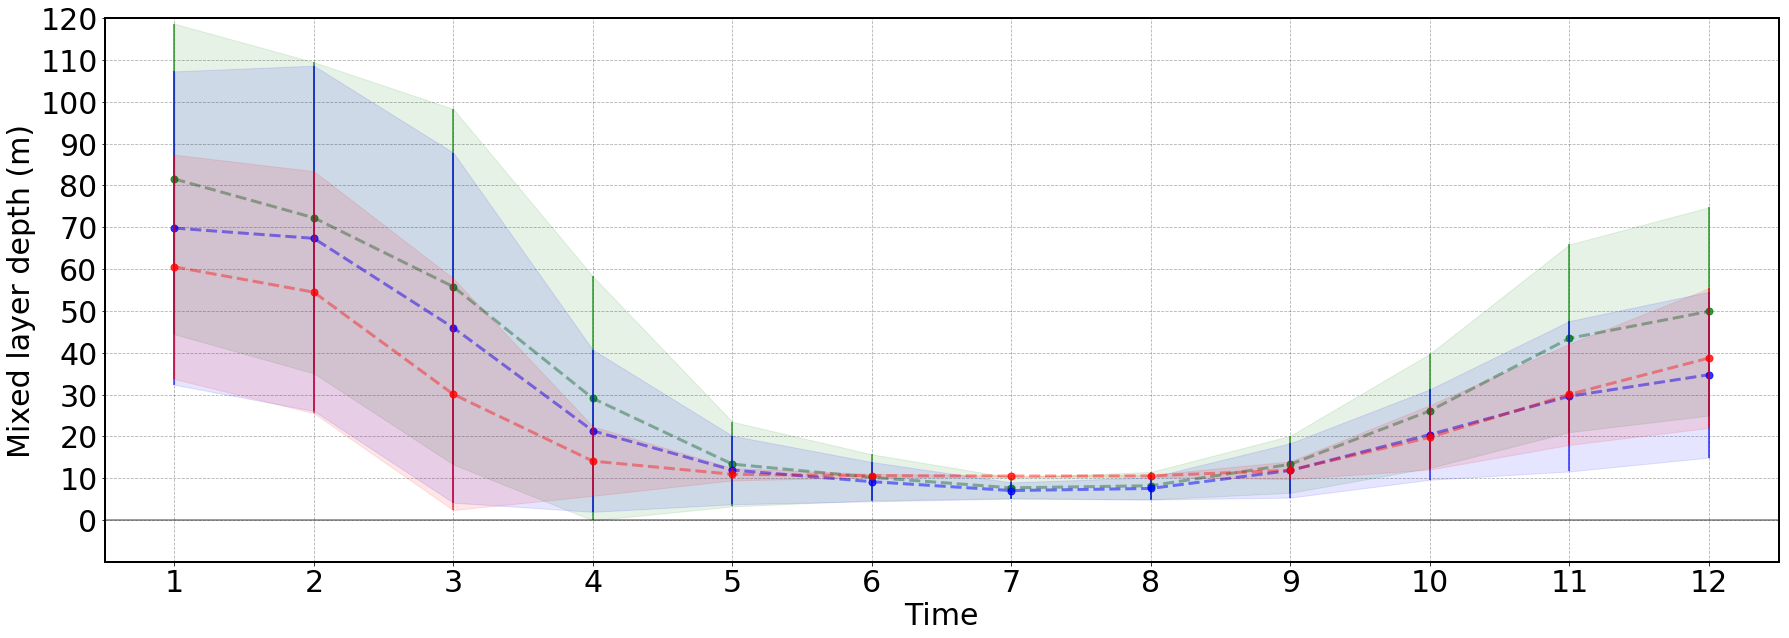

In [42]:
plt.figure(figsize=(30,10))
plt.ylim(-10,120)
plt.xlim(0.5,12.5)

mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)
mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)

plt.plot(month, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(month,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(month, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(month, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(month,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(month, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(month, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(month,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(month, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 30) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 30) 
# plt.grid(True)
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

# Eastern Gulf of Maine

In [130]:
glorys_mean = [40.914078, 45.81155, 29.24539, 16.08947, 
              11.979482, 10.654996, 10.528885, 10.557119, 
              12.134308, 20.782228, 32.810783, 42.60384]

temp_mean = [47.83263157894737, 53.19785714285714, 44.54029850746269, 36.53677811550152, 
            18.570042194092828, 12.581267217630854, 8.405797101449275, 8.81081081081081, 
            13.863636363636363, 30.171223021582733, 44.40886699507389, 32.6]

dens_mean = [38.04, 48.82642857142857, 34.3134328358209, 22.316468842729968, 
            13.681376518218624, 9.943243243243243, 8.028985507246377, 7.704781704781705, 
            12.223776223776223, 22.260806916426514, 28.902676399026763, 30.0]

glorys_std = [20.480196, 26.527634, 16.38454, 8.049578, 
             5.299264, 0.6541015, 9.536743e-07, 0.24287306, 
             1.83833, 7.9630747, 12.889598, 4.6748137]

temp_std = [25.136040144132163, 30.898923855179216, 27.397162178468072, 26.630767279807273, 
           18.17317275588105, 14.827507069203252, 3.3332703207654713, 5.044043807191251, 
           13.122830399191724, 18.210860245422754, 22.023281908174816, 7.031358332498779]

dens_std = [24.038168771658476, 32.40349322155226, 23.973504625659842, 16.474723341915315, 
           7.824024646430418, 7.1636862223428, 3.0406474067152005, 3.077001740861054, 
           12.741057239738304, 12.743410680638009, 16.066627322439313, 5.138093031466052]

In [131]:
mean_wind = [9.595285268930288, 9.27486067551833, 8.75803962120643, 7.678154578575721, 6.482037470890925, 6.158696101262019, 5.6420722374549275, 5.456596961388221, 6.29670656644381, 7.809029212364783, 8.620392432579628, 9.324161236102764]
std_wind = [0.65408015, 0.54800195, 0.73458505, 0.6633722, 0.62746245, 0.42443055, 0.452225, 0.40316236, 0.45574486, 0.5752284, 0.6534001, 0.60049516]


In [132]:
mean_SAT = [274.3831129807692, 273.95738807091345, 275.3699481670673, 278.32198392427887, 281.53162560096155, 285.39316030649036, 289.33768404447113, 290.43443885216345, 288.8731032151442, 285.31313852163464, 281.30992713341345, 277.40345177283655]
std_SAT = [1.5516274, 1.4265348, 1.0504847, 0.8967405, 0.8415735, 0.8516856, 1.0320016, 0.9455515, 0.87947965, 1.0588404, 0.9663281, 1.65596]
print(scipy.stats.pearsonr(mean_SAT, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, temp_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, dens_mean)[0])

-0.8162249633866084
-0.8983105187561358
-0.8973508009768174


In [105]:
import scipy.stats
print(scipy.stats.pearsonr(mean_wind, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_wind, temp_mean)[0])
print(scipy.stats.pearsonr(mean_wind, dens_mean)[0])

0.8858530945113545
0.9416447372528963
0.884826727692779


In [83]:
temp_bias = [a_i - b_i for a_i, b_i in zip(temp_mean[2:4], glorys_mean[2:4])]
print(np.mean(temp_bias))
print((np.mean(temp_bias))/(np.mean(glorys_mean)))
dens_bias = [a_i - b_i for a_i, b_i in zip(dens_mean[2:4], glorys_mean[2:4])]
print(np.mean(dens_bias))
print((np.mean(dens_bias))/(np.mean(glorys_mean)))

17.871108311482104
0.7548192345487131
5.647520839275433
0.23853346321341037


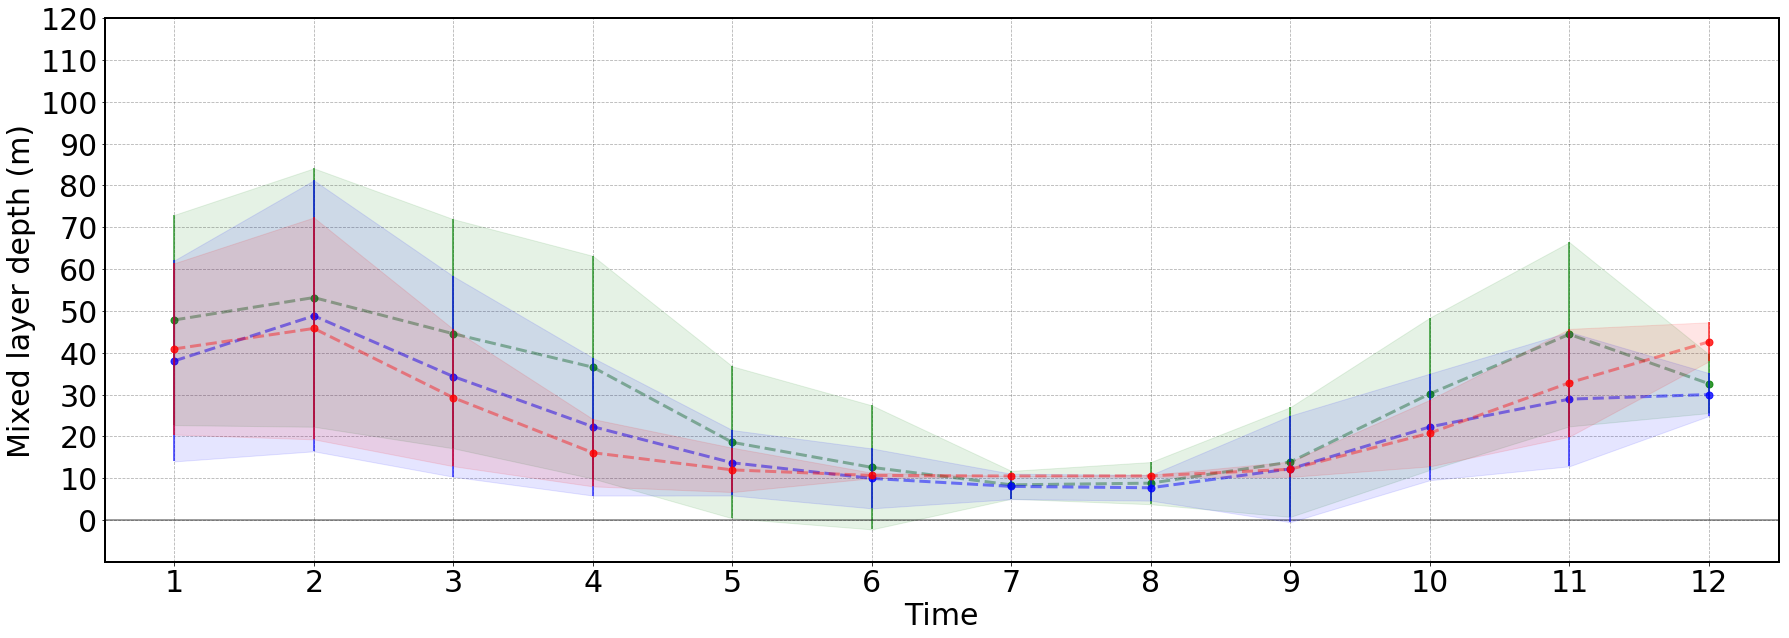

In [44]:
plt.figure(figsize=(30,10))
plt.ylim(-10,120)
plt.xlim(0.5,12.5)

mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)
mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)

plt.plot(month, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(month,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(month, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(month, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(month,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(month, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(month, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(month,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(month, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 30) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 30) 
# plt.grid(True)
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

# Georges Bank

In [127]:
glorys_mean = [42.268135, 38.97756, 31.365765, 18.943373, 
              11.232534, 10.667695, 10.528363, 10.667767, 
              13.231955, 21.856321, 34.58736, 37.381298]

temp_mean = [49.959101654846336, 48.64175475687104, 48.87246891651864, 42.01288043478261, 
            25.563384615384614, 21.028617106314947, 12.751712328767123, 15.044028950542822, 
            19.367346938775512, 28.667870036101082, 37.67887323943662, 41.83050847457627]

dens_mean = [46.12322274881517, 44.459538784067085, 44.192932862190816, 34.95763888888889, 
            22.997880928355197, 19.161734287987272, 11.335042735042736, 13.222289156626506, 
            16.557562076749434, 24.906926406926406, 31.683916083916085, 34.932203389830505]

glorys_std = [20.39434, 19.79479, 18.717056, 11.743411, 
             2.2396529, 0.9989761, 0.008914507, 0.8131427, 
             4.428041, 9.961491, 13.208445, 13.434395]

temp_std = [19.7284749661114, 20.98890829317792, 20.234765260945146, 21.751099731489038, 
           20.512755077075116, 18.51874750620884, 13.406129647904473, 14.016614858475585, 
           14.605351874984223, 16.360099834120433, 18.231947780124077, 19.03044175264399]

dens_std = [20.4370199143324, 21.840206758037358, 20.783561207999426, 21.459724136704203, 
           19.550977005427384, 17.82579516557412, 11.981348155806689, 13.078746101176483, 
           13.65119184363731, 15.974162794613433, 18.40502230921626, 18.473402232949063]

In [128]:
mean_wind = [9.484281686636118, 9.212073692908653, 8.772118788499098, 7.768536494328425, 6.474704448993389, 5.955683194673979, 5.356463505671575, 5.208614642803486, 6.210655212402344, 7.635834327110877, 8.466881385216347, 9.206166194035458]
std_wind = [0.60258365, 0.50054455, 0.81124234, 0.65462387, 0.49643794, 0.5368194, 0.41672403, 0.44826022, 0.43679282, 0.5210739, 0.7271267, 0.58045274]

In [129]:
mean_SAT = [277.1559870793269, 276.47156700721155, 277.45132211538464, 280.0252028245192, 283.1305964543269, 287.16665414663464, 291.31002103365387, 292.55140099158655, 291.15243765024036, 287.5869328425481, 283.6864483173077, 279.9886944110577]
std_SAT = [1.4371417, 1.3191122, 1.0681868, 0.9385653, 0.9472468, 1.0082572, 1.1446038, 0.9488431, 1.0409759, 1.088267, 1.1136998, 1.6765424]
print(scipy.stats.pearsonr(mean_SAT, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, temp_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, dens_mean)[0])

-0.7999125714726107
-0.9594686352325593
-0.963242106844536


In [108]:
import scipy.stats
print(scipy.stats.pearsonr(mean_wind, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_wind, temp_mean)[0])
print(scipy.stats.pearsonr(mean_wind, dens_mean)[0])


0.9586021660892847
0.9604616204129464
0.9484294930137622


In [85]:
temp_bias = [a_i - b_i for a_i, b_i in zip(temp_mean[2:4], glorys_mean[2:4])]
print(np.mean(temp_bias))
print((np.mean(temp_bias))/(np.mean(glorys_mean)))
dens_bias = [a_i - b_i for a_i, b_i in zip(dens_mean[2:4], glorys_mean[2:4])]
print(np.mean(dens_bias))
print((np.mean(dens_bias))/(np.mean(glorys_mean)))

20.288105675650627
0.8642181237889017
14.420716875539851
0.6142833185666721


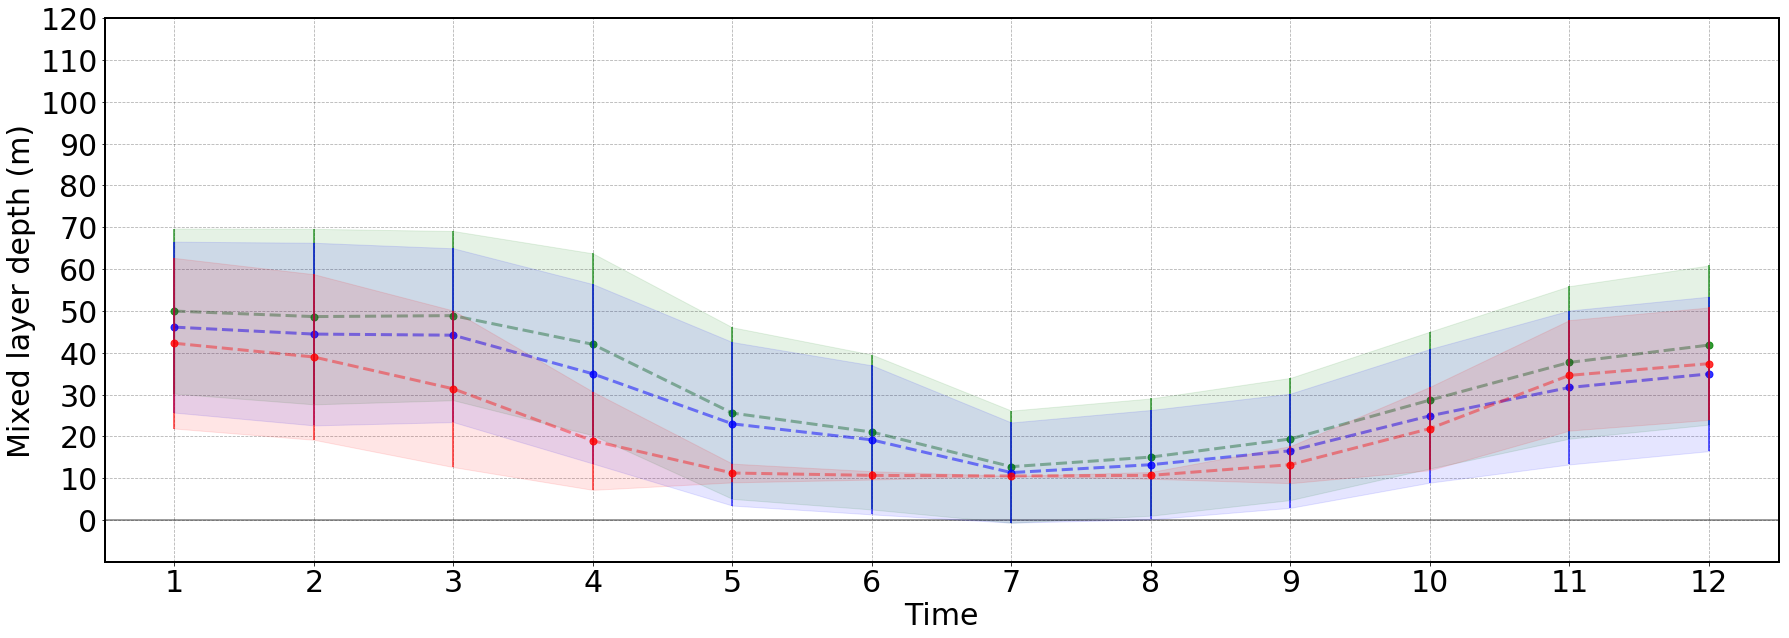

In [47]:
plt.figure(figsize=(30,10))
plt.ylim(-10,120)
plt.xlim(0.5,12.5)

mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)
mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)

plt.plot(month, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(month,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(month, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(month, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(month,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(month, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(month, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(month,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(month, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 30) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 30) 
# plt.grid(True)
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

# Southern Mid-Atlantic Bight

In [48]:
month_short = [1,2,3,4,5,6,7,8,9,10,11]

In [123]:
glorys_mean = [36.272198, 28.922642, 17.95844, 14.074039, 
              10.613273, 10.572483, 10.530501, 10.536102, 
              10.720258, 20.447403, 21.19712]
temp_mean = [39.09604519774011, 34.45342126957956, 24.81192438196801, 28.14814814814815, 
            9.207575757575757, 7.990215264187867, 8.22087745839637, 9.013513513513514, 
            13.192419825072886, 22.776470588235295, 25.321180555555557]
dens_mean = [38.76136363636363, 32.113673805601316, 21.41488857278331, 15.528494816059366, 
            8.368181818181819, 7.369140625, 7.442598187311178, 7.833783783783784, 
            10.326876513317192, 19.316091954022987, 20.264248704663213]

glorys_std = [26.62865, 21.124783, 12.88148, 5.623632, 
             0.70196474, 0.43487254, 0.02582027, 0.19490956, 
             1.0747466, 10.21987, 8.90397]
temp_std = [20.74833969691908, 24.27437655666871, 19.86057834763557, 21.242596201877998, 
           5.359014229966931, 2.7665004267477666, 2.586404548551078, 3.225293798656988, 
           6.302613405423736, 11.741205941257368, 12.905612312550076]
dens_std = [24.193816977870146, 25.0086692220125, 20.31606553852819, 21.72020725388601, 
           4.872236095778073, 2.3581774369149175, 2.24729401938054, 2.5416943182264466, 
           5.206271053505749, 12.586166220476969, 12.37235831772953]


In [124]:
mean_wind = [8.152087284968449, 7.859437208909255, 7.524549630972055, 7.078031686636118, 6.071475689227764, 5.532495351938101, 5.330329895019531, 5.2779083251953125, 6.076092059795673, 6.8478569617638225, 7.4642181396484375]
std_wind = [0.46478415, 0.5163962, 0.6339799, 0.5388084, 0.5040365, 0.45099324, 0.3854699, 0.5213946, 0.43054473, 0.48211947, 0.53777957]

In [126]:
mean_SAT = [278.6342961237981, 278.43656099759613, 280.2122145432692, 283.86825796274036, 288.25112680288464, 293.6640625, 297.341796875, 297.4465895432692, 295.1336012620192, 290.46131310096155, 285.49889197716345]
std_SAT = [1.7347445, 1.673405, 1.3877414, 1.021381, 1.1498811, 1.0154973, 0.8140036, 0.8312751, 0.7989389, 0.94789314, 1.3370237]
print(scipy.stats.pearsonr(mean_SAT, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, temp_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, dens_mean)[0])

-0.7857748201917443
-0.8901495738923098
-0.8545218560788835


In [115]:
import scipy.stats
print(scipy.stats.pearsonr(mean_wind, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_wind, temp_mean)[0])
print(scipy.stats.pearsonr(mean_wind, dens_mean)[0])


0.8693185582174271
0.9613122379314106
0.9209476272400726


In [87]:
temp_bias = [a_i - b_i for a_i, b_i in zip(temp_mean[2:4], glorys_mean[2:4])]
print(np.mean(temp_bias))
print((np.mean(temp_bias))/(np.mean(glorys_mean)))
dens_bias = [a_i - b_i for a_i, b_i in zip(dens_mean[2:4], glorys_mean[2:4])]
print(np.mean(dens_bias))
print((np.mean(dens_bias))/(np.mean(glorys_mean)))

10.463796765058078
0.5999744012186397
2.455452194421337
0.14079100475158737


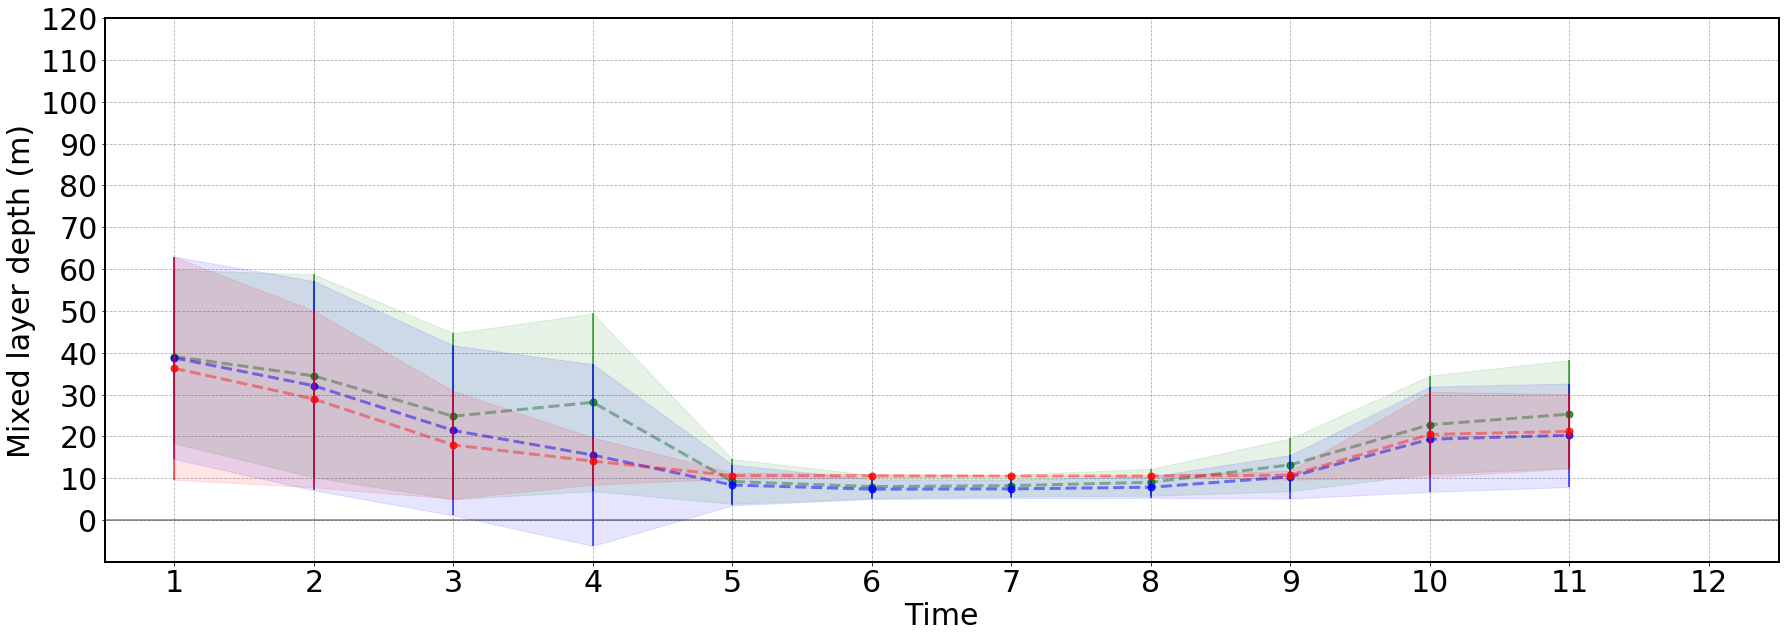

In [50]:
plt.figure(figsize=(30,10))
plt.ylim(-10,120)
plt.xlim(0.5,12.5)

mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)
mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)

plt.plot(month_short, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(month_short,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(month_short, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(month_short, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(month_short,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(month_short, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(month_short, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(month_short,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(month_short, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 30) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 30) 
# plt.grid(True)
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

# Northern Mid-Atlantic Bight

In [119]:
glorys_mean = [39.450264, 27.002724, 15.0546, 16.107042, 10.918143, 10.53396, 10.52757, 10.569466, 12.733018, 18.00977, 24.90461, 34.61158]
temp_mean = [39.68666666666667, 38.04185351270553, 26.387423935091277, 28.485294117647058, 11.352617079889807, 8.971867007672634, 
            7.504310344827586, 8.854945054945055, 15.523958333333333, 23.647058823529413, 32.33827160493827, 33.279411764705884]
dens_mean = [39.68666666666667, 35.00146627565982, 21.85602350636631, 24.23512747875354, 9.540983606557377, 8.20460358056266, 
            6.879310344827586, 7.914285714285715, 12.90852390852391, 20.48109243697479, 27.968215158924206, 32.455882352941174]

glorys_std = [17.332245, 15.573459, 8.730723, 9.334397, 1.9239658, 0.24701044, 0.024504138, 0.251583, 3.9439416, 7.709512, 10.643145, 11.60574]
temp_std = [17.232580254338647, 18.269810923578948, 18.31917837141301, 17.077068083405287, 8.015973208801672, 5.445073452491633, 
           2.642487472367111, 4.36278627918675,  7.74404670257077, 12.307911123477881, 14.965198871366999, 14.358688278033755]
dens_std = [18.05054631367766, 18.996719833143583, 17.176158095171314, 14.483113584150262, 5.815206475691342, 4.55026817274264, 
           2.3713635405852727, 3.8389722591182442, 7.107136036719628, 12.021586836482347, 14.827829085751205, 15.520796128315949]


In [120]:
mean_wind = [8.74374272273137, 8.391336294320913, 7.948691734900842, 7.166446392352764, 6.227684020996094, 5.797572796161358, 5.436471792367788, 5.296771122859075, 6.138907212477464, 7.318822420560396, 8.058096665602465, 8.499605032113882]
std_wind = [0.5610556, 0.50258464, 0.7022079, 0.57520235, 0.43374184, 0.5127475, 0.33590987, 0.47466588, 0.35081932, 0.5394663, 0.54301745, 0.54387164]

In [122]:
mean_SAT = [276.6040602463942, 276.12015474759613, 277.6858661358173, 281.0604905348558, 285.20834585336536, 290.3761455829327, 294.82247220552887, 295.33248197115387, 292.9182316706731, 288.4015925480769, 283.84536508413464, 279.76712740384613]
std_SAT = [1.8662668, 1.6869031, 1.2487553, 0.91064024, 0.9156366, 0.9232244, 0.9657897, 0.88613224, 0.8104478, 0.96597594, 1.2053249, 2.14835]
print(scipy.stats.pearsonr(mean_SAT, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, dens_mean)[0])
print(scipy.stats.pearsonr(mean_SAT, temp_mean)[0])

-0.7190028900746891
-0.8643610509767274
-0.8778380775427713


In [118]:
import scipy.stats
print(scipy.stats.pearsonr(mean_wind, glorys_mean)[0])
print(scipy.stats.pearsonr(mean_wind, temp_mean)[0])
print(scipy.stats.pearsonr(mean_wind, dens_mean)[0])

0.8734037087849772
0.9709395248234539
0.9625625373894359


In [89]:
temp_bias = [a_i - b_i for a_i, b_i in zip(temp_mean[2:4], glorys_mean[2:4])]
print(np.mean(temp_bias))
print((np.mean(temp_bias))/(np.mean(glorys_mean)))
dens_bias = [a_i - b_i for a_i, b_i in zip(dens_mean[2:4], glorys_mean[2:4])]
print(np.mean(dens_bias))
print((np.mean(dens_bias))/(np.mean(glorys_mean)))

11.855538026369167
0.6174149825426307
7.4647544925599245
0.3887509157709985


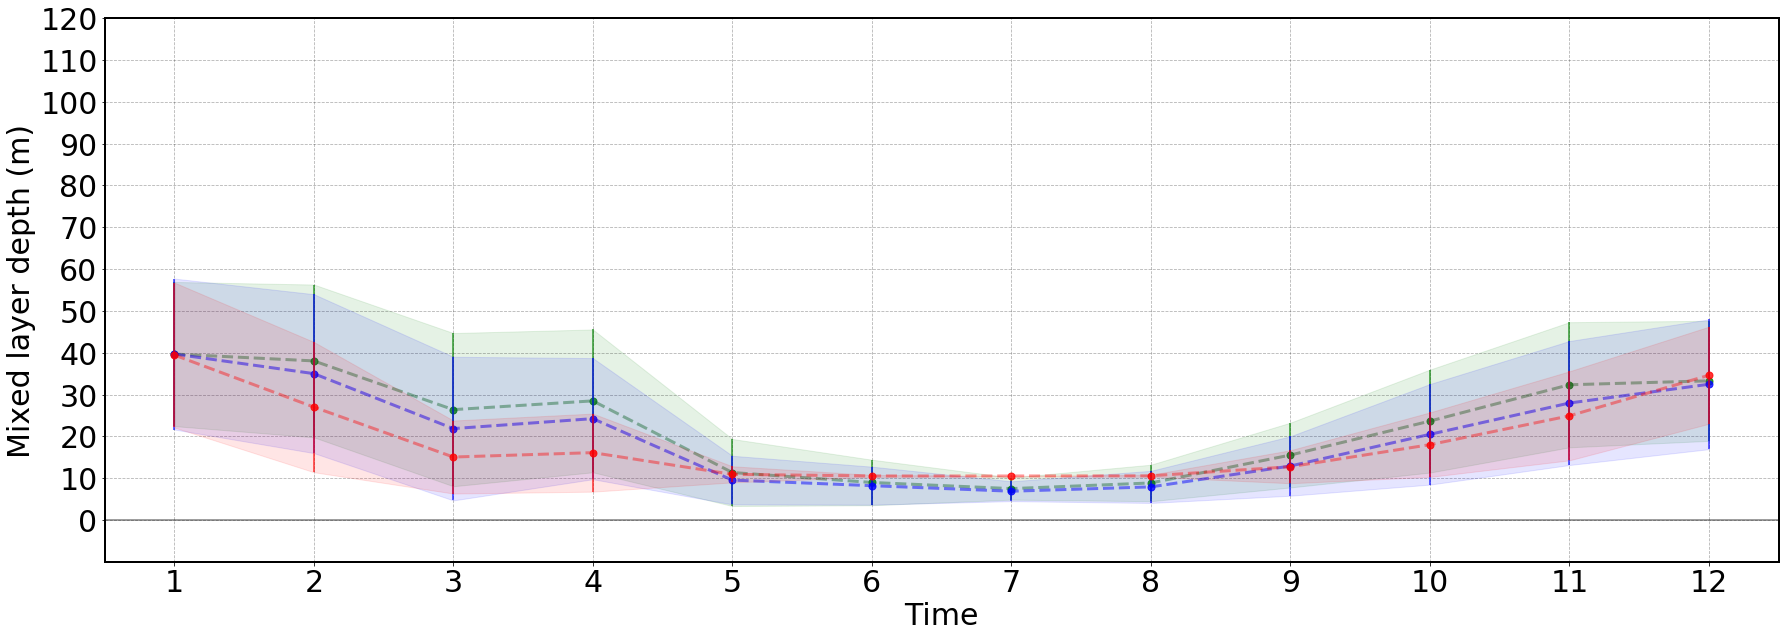

In [53]:
plt.figure(figsize=(30,10))
plt.ylim(-10,120)
plt.xlim(0.5,12.5)

mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)
mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)

plt.plot(month, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(month,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(month, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(month, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(month,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(month, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(month, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(month,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(month, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 30) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 30) 
# plt.grid(True)
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()